       age         workclass  fnlwgt   education  education_num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

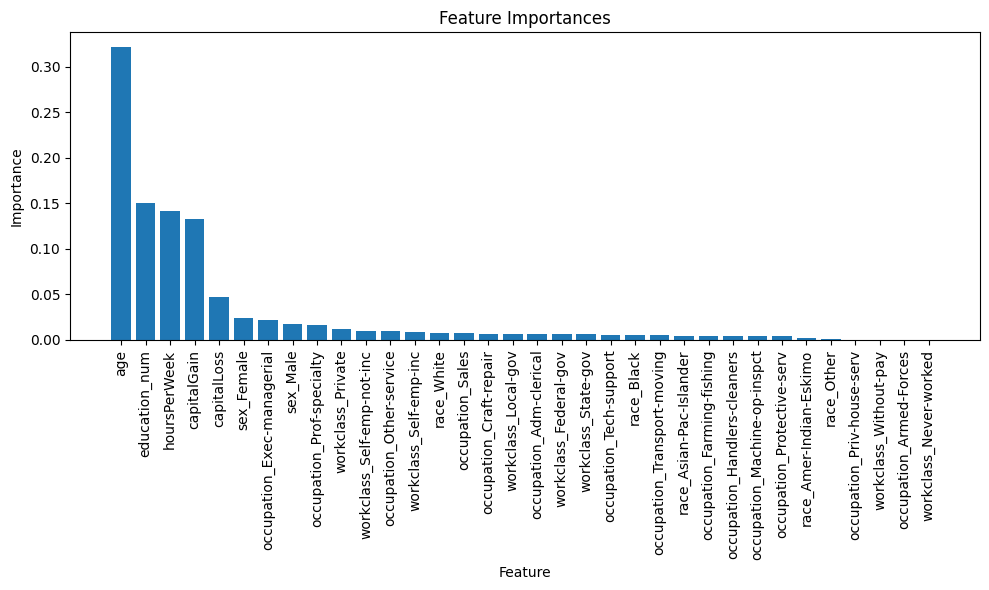

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
data = pd.read_csv('adult.csv')
print(data)
data = data.drop(columns=['fnlwgt', 'nativeCountry', 'education', 'relationship', 'marital-status'])
data_encoded = pd.get_dummies(data)
X = data_encoded.drop(columns=['income_<=50K', 'income_>50K'])
y = data_encoded['income_>50K']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
importances = rf_classifier.feature_importances_
print(importances)
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
print(indices)
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()  

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv('adult.csv')

# Convert 'income' into a numeric target
data['income_numeric'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

# Encode categorical columns
label_encoders = {}
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target (using 'income_numeric' as the target)
X = data.drop(['income', 'income_numeric'], axis=1)  # Features
y = data['income_numeric']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.10
R-squared: 0.43


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_class = rf_classifier.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.73      0.62      0.67      2314

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load your data
data = pd.read_csv("data.csv")  # Replace with your actual file path

# Step 2: Define features and target
X = data[['G', 'wL', 'wp', 'IP', '% Clay', '% Silt', '% Sand','Pressure']]
y = data['cv']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

test_data = pd.DataFrame({
    'G': [2.7, 2.7, 2.7, 2.7],
    'wL': [73.5, 73.5, 73.5, 73.5],
    'wp': [37.9, 37.9, 37.9, 37.9],
    'IP': [35.6, 35.6, 35.6, 35.6],
    '% Clay': [37.9, 37.9, 37.9, 37.9],
    '% Silt': [51.5, 51.5, 51.5, 51.5],
    '% Sand': [35.5, 35.5, 35.5, 35.5],
    'Pressure': [25, 50, 100, 200]
})

# Step 5: Predict `sv` values for the test data
cv_predictions = model.predict(test_data)

# Display the predictions
for idx, cv_pred in enumerate(cv_predictions, start=1):
    print(f"Prediction {idx}: cv = {cv_pred}")


Mean Squared Error: 0.48605923666665074
R-squared Score: 0.9896126441265881
Prediction 1: cv = 1.3867999999999971
Prediction 2: cv = 1.053899999999998
Prediction 3: cv = 0.5635000000000006
Prediction 4: cv = 0.30800000000000005


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate some example data
np.random.seed(0)
n = 1000
X = np.random.rand(n, 2)  # Two independent variables

# Simulate counts
rate = np.exp(2 + 0.5*X[:,0] + 0.8*X[:,1])  # True Poisson rate

y = np.random.poisson(rate)

# Create a DataFrame
data = pd.DataFrame({'y': y, 'x1': X[:,0], 'x2': X[:,1]})

# Fit Poisson regression model
model = sm.GLM(data['y'], sm.add_constant(data[['x1', 'x2']]), family=sm.families.Poisson()).fit()

# Print model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.6
Date:                Thu, 07 Nov 2024   Deviance:                       991.56
Time:                        12:07:07   Pearson chi2:                     973.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6984
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9749      0.024     83.075      0.0

In [8]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Least Absolute Shrinkage and Selection Operator (LASSO)
# Generating some random data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso regression
lasso_reg = Lasso(alpha=0.1)  # You can adjust the alpha parameter for strength of regularization
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso MSE:", lasso_mse)

# Ridge regression
ridge_reg = Ridge(alpha=0.1)  # You can adjust the alpha parameter for strength of regularization
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge MSE:", ridge_mse)

Lasso MSE: 0.18237823772606268
Ridge MSE: 0.14477190661275935


In [9]:
import numpy as np
import statsmodels.api as sm

# Generating some example data
np.random.seed(42)
n = 1000
x = np.random.normal(size=n)
z = np.random.binomial(1, 0.2, size=n)  # Binary process
y_count = np.random.poisson(np.exp(x))  # Count process
y = np.where(z == 1, 0, y_count)  # Combining zero-inflation and count process

# Creating design matrices
X = sm.add_constant(x)
Z = sm.add_constant(z)
print(X,Z)
# Fitting the zero-inflated negative binomial model
model = sm.ZeroInflatedNegativeBinomialP(y, X, Z)
results = model.fit()
print(results.summary())

[[ 1.          0.49671415]
 [ 1.         -0.1382643 ]
 [ 1.          0.64768854]
 ...
 [ 1.          0.64084286]
 [ 1.         -0.57117899]
 [ 1.          0.57258278]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:3938: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:3974: RuntimeWarning: invalid value encountered in log
  dgterm = dgpart + np.log(a1 / a2) + 1 - a3 / a2
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:4329: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred)
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:3937: RuntimeWarning: invalid value encountered in multiply
  a1 * np.log(a1) + y * np.l

         Current function value: nan
         Iterations: 2
         Function evaluations: 113
         Gradient evaluations: 113
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 y   No. Observations:                 1000
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      998
Method:                                      MLE   Df Model:                            1
Date:                           Thu, 07 Nov 2024   Pseudo R-squ.:                     nan
Time:                                   12:11:15   Log-Likelihood:                    nan
converged:                                 False   LL-Null:                       -1561.8
Covariance Type:                       nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [10]:
"""Negative binomial regression is used to test for connections between confounding and predictor 
variables on a count outcome variable."""

import numpy as np
import statsmodels.api as sm

# Generate sample data
np.random.seed(123)
n_obs = 100
X = np.column_stack((np.ones(n_obs), np.random.normal(0, 1, n_obs)))
true_coefficients = np.array([1.5, 0.5])  # True coefficients
prob = 1 / (1 + np.exp(-np.dot(X, true_coefficients)))  # Probability of success
y = np.random.negative_binomial(1, prob)  # Generate negative binomial distributed response variable

# Fit the negative binomial regression model
negbin_model = sm.GLM(y, X, family=sm.families.NegativeBinomial())
negbin_results = negbin_model.fit()

# Print the summary of the model
print(negbin_results.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.513
Date:                Thu, 07 Nov 2024   Deviance:                       62.983
Time:                        12:32:19   Pearson chi2:                     91.7
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0007459
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3866      0.224     -6.197      0.0

C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [12]:
""" Multinomial regression is a statistical method used to model the relationship between multiple 
categorical dependent variables and one or more independent variables. It is an extension of binary logistic 
regression. """


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


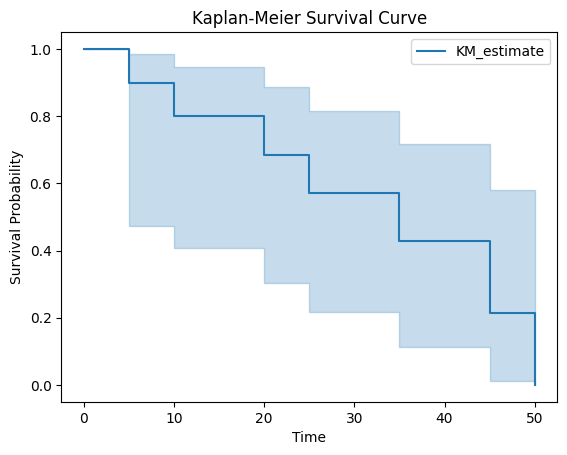

Median Survival Time: 35.0


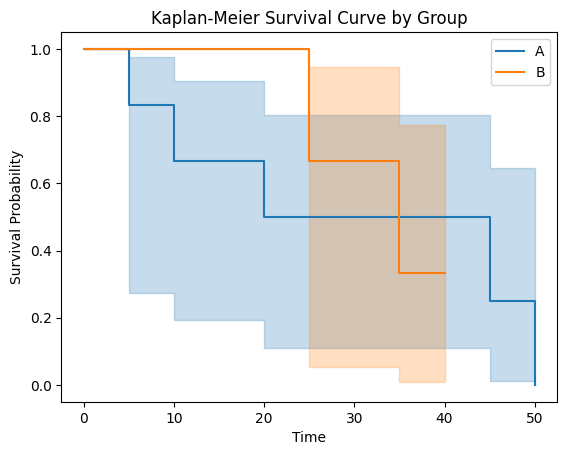

In [1]:
#survival analysis
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Example dataset
data = {
    'time': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'event': [1, 1, 0, 1, 1, 0, 1, 0, 1, 1],  # 1 for event occurred, 0 for event censored
    'group': ['A', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A']  # Example grouping variable
}

df = pd.DataFrame(data)

# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(df['time'], event_observed=df['event'])

# Plot Kaplan-Meier survival curve
kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

# Compute median survival time
median_survival_time = kmf.median_survival_time_
print("Median Survival Time:", median_survival_time)

# Compare survival curves between groups
groups = df['group'].unique()
for group in groups:
    group_data = df[df['group'] == group]
    kmf.fit(group_data['time'], event_observed=group_data['event'])
    kmf.plot(label=group)
plt.title('Kaplan-Meier Survival Curve by Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()